In [1]:
import copy
import pathlib
from typing import Optional
import os.path
import math

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats import proportion

In [3]:
from drmdp import dataproc

In [4]:
import warnings # To suppress some warnings
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [5]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/drmdp/workflows/controljob/agg/1746115037/1746166333/metrics/*.parquet")

In [6]:
df_metrics = dataproc.read_data(files, reader="pd")

In [7]:
df_metrics

,episode,exp_id,meta,returns,metrics,method
0,710,1746115037-00b9abcd-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[102.02783073563408, 104.33277137208779, 301.7...","{'returns': {'mean': 160.70075962951634, 'std'...",IMR
1,710,1746115037-01241eab-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[141.96122545991437, 158.30323632080845, 160.0...","{'returns': {'mean': 138.1951380766256, 'std':...",DMR
2,710,1746115037-19ac5573-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[14.36361851327176, 14.135411317837095, 14.485...","{'returns': {'mean': 94.14181259366002, 'std':...",DMR
3,710,1746115037-18a93f64-Finite-CC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[373.72272162757696, 372.6428221199749, 368.10...","{'returns': {'mean': 371.2849843573612, 'std':...",IMR
4,710,1746115037-0a19b809-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[53.40493990335529, 50.018484348888315, 52.417...","{'returns': {'mean': 50.97578817325536, 'std':...",OP-S
...,...,...,...,...,...,...
6619,18350,1746115037-c693da3d-IceWorld-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[-14.94479864857501, -15.733856465587706, -15....","{'returns': {'mean': -15.350051768296005, 'std...",IMR
6620,18350,1746115037-cc958b03-IceWorld-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[-14.06353877172906, -13.963707699852868, -13....","{'returns': {'mean': -14.053504804461154, 'std...",LEAST-BFA
6621,18350,1746115037-d1dd8368-IceWorld-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[-33.336984360525314, -33.40777069369517, -33....","{'returns': {'mean': -33.382703939839786, 'std...",OP-A
6622,18350,1746115037-f1d39cc9-RedGreen-v0,"{'context': {'dummy': 0}, 'exp_id': '174611503...","[-12.8272028772274, -12.672824369244182, -10.2...","{'returns': {'mean': -11.906962381704904, 'std...",OP-A


In [8]:
df_metrics.iloc[0]["meta"]

{'context': {'dummy': 0},
 'exp_id': '1746115037-00b9abcd-Finite-SC-ShuntDc-v0',
 'instance_id': 9,
 'run_config': {'episodes_per_run': 1000,
  'log_episode_frequency': 10,
  'num_runs': 15,
  'output_dir': 'gs://mo-hendrix-ml-workflows-storage/drmdp/workflows/controljob/logs/1746115037/1746115037-00b9abcd-Finite-SC-ShuntDc-v0/run_9/zero-impute/f4cf45c3',
  'use_seed': True},
 'env_spec': {'args': {'constraint_violation_reward': 0.0,
   'max_episode_steps': 200.0,
   'penalty_gamma': 1.0,
   'reward_fn': 'pos-enf'},
  'feats_spec': {'args': None, 'name': 'scale'},
  'name': 'Finite-SC-ShuntDc-v0'},
 'epochs': 1,
 'problem_spec': {'delay_config': {'args': {'delay': 8.0}, 'name': 'fixed'},
  'epsilon': 0.2,
  'gamma': 1.0,
  'learning_rate_config': {'args': {'initial_lr': 0.01}, 'name': 'constant'},
  'policy_type': 'markovian',
  'reward_mapper': {'args': None, 'name': 'zero-impute'}},
 'reward_mapper': 'IMR',
 'policy_type': 'PP'}

In [9]:
envs = dataproc.get_distinct_envs(df_metrics)

In [10]:
for env_name, args in envs.items():
    print(env_name, args)

Finite-SC-ShuntDc-v0 {'constraint_violation_reward': 0.0, 'max_episode_steps': 200.0, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-SC-PermExDc-v0 {'constraint_violation_reward': 0.0, 'max_episode_steps': 200.0, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-CC-ShuntDc-v0 {'constraint_violation_reward': 0.0, 'max_episode_steps': 200.0, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-TC-PermExDc-v0 {'constraint_violation_reward': 0.0, 'max_episode_steps': 200.0, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
GridWorld-v0 {'max_episode_steps': 200.0}
MountainCar-v0 {'max_episode_steps': 2500.0}
Finite-CC-PermExDc-v0 {'constraint_violation_reward': 0.0, 'max_episode_steps': 200.0, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
IceWorld-v0 None
RedGreen-v0 None


## Comparison: T-Test

In [11]:
PVALUE_THRESHOLD = 0.05

In [12]:
def parse_delay_config(df_input: pd.DataFrame):
    df = copy.deepcopy(df_input)
    def parse_mu(delay_config):
        if delay_config is None:
            return None
        args = delay_config["args"]
        try:
            return args["delay"]
        except KeyError:
            return args["lam"]
        except KeyError as exc:
            raise ValueError(f"Unknown delay config {args}") from exc
    df["delay_type"] = df["delay_config"].apply(lambda dc: dc["name"] if dc else None)
    df["delay_mu"] = df["delay_config"].apply(parse_mu)
    del df["delay_config"]
    return df

In [13]:
def max_episode_filter(df_input):
    env_spec = df_input["meta"].apply(lambda meta: meta["env_spec"])
    env_name = env_spec.apply(lambda spec: spec["name"])
    envs = env_name.unique()
    dfs = []
    for env in envs:
        df_slice = df_input[
            (env_name == env)
        ]
        df_slice = df_slice[df_slice["episode"] == df_slice["episode"].max()]
        dfs.append(
            copy.deepcopy(df_slice)
        )
    return pd.concat(dfs)

In [14]:
def sample_stat_test_method_comparison(
    df_data, episode: Optional[int] = None
):
    if episode is not None:
        df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    else:
        df_result = max_episode_filter(df_data)
    for key in ("delay_config", "gamma",):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["problem_spec"][key])
    
    df_result = parse_delay_config(df_result)

    specs = {
        "env": df_result["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_result["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"])
    }
    
    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_result[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    # (env/level)  x (algorithm/algorithm_args) x reward period -> which method is the winner
    del df_result["meta"]
    del df_result["exp_id"]
    
    def mannwhitney_less_than_test(xs, ys):
        xs_stat, pvalue = stats.mannwhitneyu(xs, ys, alternative="less")
        if pvalue < PVALUE_THRESHOLD:
            outcome = "Reject H0 (Less than)"
        else:
            outcome = "Fail to reject H0 (Similar)"
        return outcome

    def ztest(left_pos, left_neg, right_pos, right_neg):
        zstat, pvalue = proportion.proportions_ztest(
            count=left_pos, nobs=left_pos + left_neg, 
            value=right_pos / (right_pos + right_neg)
        )                
        if pvalue < PVALUE_THRESHOLD:
            outcome = "Reject H0 (Different)"
        else:
            outcome = "Fail to reject H0 (Similar)"
        return outcome        
        
    rows = []
    keys = ["env_name", "gamma", "delay_mu"]
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]

    baselines = {}
    for row in df_baseline.to_dict("records"):
        key = tuple(row[key] for key in keys[:-1])
        baselines[key] = row["returns"]

    rows = []
    for row in df_result.to_dict("records"):
        key = tuple([row[key] for key in keys[:-1]])
        full_reward_mean_return = baselines[key]

        test_result = mannwhitney_less_than_test(row["returns"], full_reward_mean_return)
        row["mannwhitney_less_than_test"] = test_result
        rows.append(row)
    df_test_result = pd.DataFrame(rows)
    
    # aggreate over algorithm args and reward periods
    agg_keys = ["method", "mannwhitney_less_than_test"]
     
    df_test_result_agg = df_test_result[agg_keys].value_counts(
    ).reset_index().sort_values(agg_keys) 

    method_rows = df_test_result_agg.pivot(
            index="method", columns="mannwhitney_less_than_test", values="count"
        ).reset_index().to_dict("records")
    df_test_result_agg = pd.DataFrame(method_rows)
    
    rows = []
    for left in method_rows:
        for right in method_rows:
            outcome = ztest(
                left_pos=left["Fail to reject H0 (Similar)"], left_neg = left["Reject H0 (Less than)"],
                right_pos=right["Fail to reject H0 (Similar)"], right_neg = right["Reject H0 (Less than)"],
            )
            row = {
                "left": left["method"],
                "right": right["method"],
                "outcome": outcome,
            }
            rows.append(row)
    df_conf = pd.DataFrame(rows)
    return {"sarsa": df_test_result}, {"sarsa": df_test_result_agg}, {"sarsa": df_conf}

In [15]:
def rations(df):
    return df["Fail to reject H0 (Similar)"] / (df["Fail to reject H0 (Similar)"] + df["Reject H0 (Less than)"])

**K=100**

In [16]:
df_test_outcome_k100, df_test_agg_stat_k100, df_test_comparison_k100 = sample_stat_test_method_comparison(df_metrics, episode=100)

In [17]:
df_test_outcome_k100["sarsa"]

,episode,returns,metrics,method,gamma,delay_type,delay_mu,env_name,env_args,feats_name,feats_args,mannwhitney_less_than_test
0,100,"[325.0211637727358, 322.70693577446525, 14.627...","{'returns': {'mean': 96.0219756352575, 'std': ...",IMR,1.00,fixed,8.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Fail to reject H0 (Similar)
1,100,"[214.60581575364898, 230.59680298389947, 234.4...","{'returns': {'mean': 168.77987585486215, 'std'...",DMR,0.99,fixed,8.0,Finite-SC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",spliced-tiles,{'tiling_dim': 3.0},Fail to reject H0 (Similar)
2,100,"[14.403165411287379, 14.638314608998684, 14.08...","{'returns': {'mean': 96.03587873544616, 'std':...",DMR,0.99,fixed,8.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Reject H0 (Less than)
3,100,"[344.12092260932883, 376.28177485607125, 376.0...","{'returns': {'mean': 365.1260922808398, 'std':...",IMR,1.00,fixed,6.0,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",tiles,{'tiling_dim': 3.0},Fail to reject H0 (Similar)
4,100,"[374.313196284492, 374.2418928325338, 154.9510...","{'returns': {'mean': 285.0132431285519, 'std':...",LEAST-BFA,0.99,fixed,8.0,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",tiles,{'tiling_dim': 3.0},Fail to reject H0 (Similar)
...,...,...,...,...,...,...,...,...,...,...,...,...
409,100,"[-30.178217821782177, -35.32673267326733, -33....","{'returns': {'mean': -33.56105610561056, 'std'...",IMR,0.99,fixed,2.0,IceWorld-v0,None,tiles,{'tiling_dim': 6.0},Reject H0 (Less than)
410,100,"[-36.35643564356435, -39.79207920792079, -39.6...","{'returns': {'mean': -38.18547854785478, 'std'...",LEAST-BFA,0.99,fixed,4.0,IceWorld-v0,None,tiles,{'tiling_dim': 6.0},Reject H0 (Less than)
411,100,"[-49.43564356435643, -45.59405940594059, -47.5...","{'returns': {'mean': -45.62178217821783, 'std'...",OP-A,0.99,fixed,2.0,IceWorld-v0,None,tiles,{'tiling_dim': 6.0},Reject H0 (Less than)
412,100,"[-28.138613861386137, -29.099009900990097, -28...","{'returns': {'mean': -30.44026402640264, 'std'...",OP-A,0.99,fixed,4.0,RedGreen-v0,None,tiles,{'tiling_dim': 6.0},Reject H0 (Less than)


In [18]:
df_test_agg_stat_k100["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than)
0,DMR,20,52
1,IMR,46,26
2,LEAST-BFA,49,23
3,LEAST-LFA,47,25
4,OP-A,9,45
5,OP-S,14,58


In [19]:
df_test_comparison_k100["sarsa"]

,left,right,outcome
0,DMR,DMR,Fail to reject H0 (Similar)
1,DMR,IMR,Reject H0 (Different)
2,DMR,LEAST-BFA,Reject H0 (Different)
3,DMR,LEAST-LFA,Reject H0 (Different)
4,DMR,OP-A,Reject H0 (Different)
5,DMR,OP-S,Fail to reject H0 (Similar)
6,IMR,DMR,Reject H0 (Different)
7,IMR,IMR,Fail to reject H0 (Similar)
8,IMR,LEAST-BFA,Fail to reject H0 (Similar)
9,IMR,LEAST-LFA,Fail to reject H0 (Similar)


**K=500**

In [20]:
df_test_outcome_k500, df_test_agg_stat_k500, df_test_comparison_k500 = sample_stat_test_method_comparison(df_metrics, episode=500)

In [21]:
df_test_outcome_k500["sarsa"]

,episode,returns,metrics,method,gamma,delay_type,delay_mu,env_name,env_args,feats_name,feats_args,mannwhitney_less_than_test
0,500,"[309.68644757426654, 43.691886264417654, 134.1...","{'returns': {'mean': 112.56501428719346, 'std'...",IMR,1.00,fixed,8.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Fail to reject H0 (Similar)
1,500,"[165.43866896744564, 159.4061566345055, 139.60...","{'returns': {'mean': 138.9599276481078, 'std':...",DMR,0.99,fixed,8.0,Finite-SC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",spliced-tiles,{'tiling_dim': 3.0},Reject H0 (Less than)
2,500,"[374.2003089245124, 372.76456404935516, 373.96...","{'returns': {'mean': 371.5736819493035, 'std':...",IMR,1.00,fixed,6.0,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",tiles,{'tiling_dim': 3.0},Fail to reject H0 (Similar)
3,500,"[14.309518132627375, 14.518540980046515, 14.17...","{'returns': {'mean': 95.82471677460317, 'std':...",DMR,0.99,fixed,8.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Fail to reject H0 (Similar)
4,500,"[288.9743466991075, 319.0113428675391, 335.446...","{'returns': {'mean': 316.87869645808337, 'std'...",LEAST-BFA,0.99,fixed,8.0,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",tiles,{'tiling_dim': 3.0},Reject H0 (Less than)
...,...,...,...,...,...,...,...,...,...,...,...,...
409,500,"[-19.239520958083833, -20.117764471057885, -19...","{'returns': {'mean': -19.63659347970725, 'std'...",IMR,0.99,fixed,2.0,IceWorld-v0,None,tiles,{'tiling_dim': 6.0},Fail to reject H0 (Similar)
410,500,"[-24.584830339321357, -20.592814371257486, -25...","{'returns': {'mean': -21.395076513639385, 'std...",LEAST-BFA,0.99,fixed,4.0,IceWorld-v0,None,tiles,{'tiling_dim': 6.0},Reject H0 (Less than)
411,500,"[-36.818363273453095, -36.89421157684631, -36....","{'returns': {'mean': -37.27850964737192, 'std'...",OP-A,0.99,fixed,2.0,IceWorld-v0,None,tiles,{'tiling_dim': 6.0},Reject H0 (Less than)
412,500,"[-15.928143712574851, -16.806387225548903, -16...","{'returns': {'mean': -16.295143047238856, 'std...",OP-A,0.99,fixed,4.0,RedGreen-v0,None,tiles,{'tiling_dim': 6.0},Reject H0 (Less than)


In [22]:
df_test_agg_stat_k500["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than)
0,DMR,24,48
1,IMR,42,30
2,LEAST-BFA,55,17
3,LEAST-LFA,46,26
4,OP-A,6,48
5,OP-S,10,62


In [23]:
df_test_comparison_k500["sarsa"]

,left,right,outcome
0,DMR,DMR,Fail to reject H0 (Similar)
1,DMR,IMR,Reject H0 (Different)
2,DMR,LEAST-BFA,Reject H0 (Different)
3,DMR,LEAST-LFA,Reject H0 (Different)
4,DMR,OP-A,Reject H0 (Different)
5,DMR,OP-S,Reject H0 (Different)
6,IMR,DMR,Reject H0 (Different)
7,IMR,IMR,Fail to reject H0 (Similar)
8,IMR,LEAST-BFA,Reject H0 (Different)
9,IMR,LEAST-LFA,Fail to reject H0 (Similar)


**K = Max(K)**

In [24]:
df_test_outcome_kmax, df_test_agg_stat_kmax, df_test_comparison_kmax = sample_stat_test_method_comparison(df_metrics)

In [25]:
df_test_outcome_kmax["sarsa"]

,episode,returns,metrics,method,gamma,delay_type,delay_mu,env_name,env_args,feats_name,feats_args,mannwhitney_less_than_test
0,990,"[214.09497488908002, 295.43326143743957, 158.4...","{'returns': {'mean': 198.5149117348363, 'std':...",IMR,1.00,fixed,8.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Fail to reject H0 (Similar)
1,990,"[14.105735200306675, 14.161755309602563, 14.28...","{'returns': {'mean': 91.2338713469504, 'std': ...",DMR,0.99,fixed,8.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Reject H0 (Less than)
2,990,"[150.25452448964785, 149.7938874016504, 118.16...","{'returns': {'mean': 221.1435877683348, 'std':...",IMR,1.00,fixed,4.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Fail to reject H0 (Similar)
3,990,"[14.215483411594311, 281.2590227373938, 14.529...","{'returns': {'mean': 123.9368393252892, 'std':...",DMR,0.99,fixed,4.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Fail to reject H0 (Similar)
4,990,"[103.07367898873532, 194.6124682971004, 169.88...","{'returns': {'mean': 154.99667990095728, 'std'...",OP-S,0.99,fixed,6.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'max_epis...",scale,None,Reject H0 (Less than)
...,...,...,...,...,...,...,...,...,...,...,...,...
409,99990,"[-6.928653578822094, -6.927643487913913, -6.93...","{'returns': {'mean': -6.929773012904494, 'std'...",LEAST-BFA,1.00,fixed,6.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},Fail to reject H0 (Similar)
410,99990,"[-6.952885759718375, -6.957086137752397, -6.95...","{'returns': {'mean': -6.956219393078711, 'std'...",DMR,1.00,fixed,4.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},Reject H0 (Less than)
411,99990,"[-6.936084247582283, -6.934944144973048, -6.93...","{'returns': {'mean': -6.9365689578728755, 'std...",LEAST-LFA,1.00,fixed,6.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},Reject H0 (Less than)
412,99990,"[-6.972667540078607, -6.966687001830165, -6.97...","{'returns': {'mean': -6.971250745900465, 'std'...",IMR,0.99,fixed,2.0,RedGreen-v0,None,tiles,{'tiling_dim': 6},Reject H0 (Less than)


In [26]:
df_test_agg_stat_kmax["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than)
0,DMR,24,48
1,IMR,32,40
2,LEAST-BFA,60,12
3,LEAST-LFA,51,21
4,OP-A,2,52
5,OP-S,5,67


In [27]:
print(df_test_agg_stat_kmax["sarsa"].to_latex(escape=False, index=False))

\begin{tabular}{lrr}
\toprule
method & Fail to reject H0 (Similar) & Reject H0 (Less than) \\
\midrule
DMR & 24 & 48 \\
IMR & 32 & 40 \\
LEAST-BFA & 60 & 12 \\
LEAST-LFA & 51 & 21 \\
OP-A & 2 & 52 \\
OP-S & 5 & 67 \\
\bottomrule
\end{tabular}



In [28]:
rations(df_test_agg_stat_kmax["sarsa"])

0    0.333333
1    0.444444
2    0.833333
3    0.708333
4    0.037037
5    0.069444
dtype: float64

In [29]:
df_test_comparison_kmax["sarsa"]

,left,right,outcome
0,DMR,DMR,Fail to reject H0 (Similar)
1,DMR,IMR,Reject H0 (Different)
2,DMR,LEAST-BFA,Reject H0 (Different)
3,DMR,LEAST-LFA,Reject H0 (Different)
4,DMR,OP-A,Reject H0 (Different)
5,DMR,OP-S,Reject H0 (Different)
6,IMR,DMR,Fail to reject H0 (Similar)
7,IMR,IMR,Fail to reject H0 (Similar)
8,IMR,LEAST-BFA,Reject H0 (Different)
9,IMR,LEAST-LFA,Reject H0 (Different)


## Error Analysis

In [30]:
def error_cases(df_input, method):
    worse_result_mask = df_input["mannwhitney_less_than_test"].apply(
            lambda result: result == "Reject H0 (Less than)"
        )
    method_mask = df_input["method"] == method
    df_slice = copy.deepcopy(
        df_input[
            worse_result_mask &
            method_mask
        ]
    )
    df_result = df_slice[["env_name", "gamma", "delay_mu", "method"]].value_counts().reset_index()
    return df_result.sort_values(["env_name", "gamma", "delay_mu"])

In [31]:
error_cases(df_test_outcome_kmax["sarsa"], "DMR")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-PermExDc-v0,0.99,2.0,DMR,1
1,Finite-CC-PermExDc-v0,0.99,8.0,DMR,1
27,Finite-CC-PermExDc-v0,1.00,4.0,DMR,1
28,Finite-CC-PermExDc-v0,1.00,6.0,DMR,1
29,Finite-SC-PermExDc-v0,0.99,2.0,DMR,1
30,Finite-SC-PermExDc-v0,0.99,4.0,DMR,1
31,Finite-SC-PermExDc-v0,0.99,8.0,DMR,1
32,Finite-SC-PermExDc-v0,1.00,2.0,DMR,1
33,Finite-SC-PermExDc-v0,1.00,4.0,DMR,1
34,Finite-SC-PermExDc-v0,1.00,8.0,DMR,1


In [32]:
error_cases(df_test_outcome_kmax["sarsa"], "IMR")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-ShuntDc-v0,0.99,4.0,IMR,1
1,Finite-CC-ShuntDc-v0,0.99,6.0,IMR,1
23,Finite-CC-ShuntDc-v0,0.99,8.0,IMR,1
24,Finite-CC-ShuntDc-v0,1.00,2.0,IMR,1
25,Finite-CC-ShuntDc-v0,1.00,4.0,IMR,1
26,Finite-SC-ShuntDc-v0,1.00,2.0,IMR,1
27,Finite-TC-PermExDc-v0,0.99,6.0,IMR,1
28,Finite-TC-PermExDc-v0,0.99,8.0,IMR,1
29,GridWorld-v0,0.99,2.0,IMR,1
22,GridWorld-v0,0.99,4.0,IMR,1


In [33]:
error_cases(df_test_outcome_kmax["sarsa"], "OP-S")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-PermExDc-v0,0.99,2.0,OP-S,1
34,Finite-CC-PermExDc-v0,0.99,4.0,OP-S,1
36,Finite-CC-PermExDc-v0,0.99,6.0,OP-S,1
37,Finite-CC-PermExDc-v0,0.99,8.0,OP-S,1
38,Finite-CC-PermExDc-v0,1.00,2.0,OP-S,1
...,...,...,...,...,...
28,RedGreen-v0,0.99,8.0,OP-S,1
29,RedGreen-v0,1.00,2.0,OP-S,1
30,RedGreen-v0,1.00,4.0,OP-S,1
31,RedGreen-v0,1.00,6.0,OP-S,1


In [34]:
error_cases(df_test_outcome_kmax["sarsa"], "OP-A")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-PermExDc-v0,0.99,2.0,OP-A,1
1,Finite-CC-PermExDc-v0,0.99,4.0,OP-A,1
29,Finite-CC-PermExDc-v0,0.99,6.0,OP-A,1
30,Finite-CC-PermExDc-v0,1.00,2.0,OP-A,1
31,Finite-CC-PermExDc-v0,1.00,4.0,OP-A,1
32,Finite-CC-PermExDc-v0,1.00,6.0,OP-A,1
33,Finite-CC-ShuntDc-v0,0.99,2.0,OP-A,1
34,Finite-CC-ShuntDc-v0,0.99,4.0,OP-A,1
35,Finite-CC-ShuntDc-v0,0.99,6.0,OP-A,1
36,Finite-CC-ShuntDc-v0,1.00,2.0,OP-A,1


In [35]:
error_cases(df_test_outcome_kmax["sarsa"], "LEAST-LFA")

,env_name,gamma,delay_mu,method,count
0,Finite-TC-PermExDc-v0,0.99,6.0,LEAST-LFA,1
11,GridWorld-v0,0.99,4.0,LEAST-LFA,1
19,GridWorld-v0,0.99,6.0,LEAST-LFA,1
18,GridWorld-v0,0.99,8.0,LEAST-LFA,1
17,GridWorld-v0,1.00,2.0,LEAST-LFA,1
16,GridWorld-v0,1.00,4.0,LEAST-LFA,1
15,GridWorld-v0,1.00,6.0,LEAST-LFA,1
14,GridWorld-v0,1.00,8.0,LEAST-LFA,1
13,IceWorld-v0,0.99,4.0,LEAST-LFA,1
12,IceWorld-v0,0.99,6.0,LEAST-LFA,1


In [36]:
error_cases(df_test_outcome_kmax["sarsa"], "LEAST-BFA")

,env_name,gamma,delay_mu,method,count
0,Finite-SC-ShuntDc-v0,0.99,4.0,LEAST-BFA,1
1,Finite-TC-PermExDc-v0,0.99,2.0,LEAST-BFA,1
2,Finite-TC-PermExDc-v0,0.99,8.0,LEAST-BFA,1
3,GridWorld-v0,0.99,8.0,LEAST-BFA,1
4,GridWorld-v0,1.00,8.0,LEAST-BFA,1
5,IceWorld-v0,0.99,6.0,LEAST-BFA,1
6,IceWorld-v0,0.99,8.0,LEAST-BFA,1
7,IceWorld-v0,1.00,4.0,LEAST-BFA,1
8,IceWorld-v0,1.00,6.0,LEAST-BFA,1
9,IceWorld-v0,1.00,8.0,LEAST-BFA,1


## 95 CI

In [37]:
METHODS_PALETTES = {
    key: palette for key, palette in zip(
        ["FR", "DMR", "IMR", "LEAST-LFA", "LEAST-BFA", "OP-A", "OP-S"],
        sns.color_palette()
    )
}

In [38]:
def export_figure(
    figure, name: str, format: str = "pdf", dpi=300, transparent: bool = True
):
    # to be able to save, we must plot
    base_dir = os.path.dirname(name)
    if not os.path.exists(base_dir):
        tf.io.gfile.makedirs(base_dir)
    figure.savefig(f"{name}.{format}", dpi=dpi, format=format, transparent=transparent)

In [39]:
def plot_return_ci(
    df_data, gamma: float, suffix: str, 
    output_dir: str = "figures/95ci",
    episode: Optional[int] = None
):
    if episode is not None:
        df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    else:
        df_result = max_episode_filter(df_data)

    for key in ("delay_config", "gamma",):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["problem_spec"][key])

    specs = {
        "env": df_result["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_result["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"])
    }

    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_result[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    df_result = df_result[
        (df_result["gamma"] == gamma)
    ]

    # (env/level)  x (algorithm/algorithm_args) x reward period -> which method is the winner
    del df_result["meta"]
    del df_result["exp_id"]
    
    df_result = parse_delay_config(df_result)
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]
    baseline_dfs = []
    distinct_algo_configs = df_result[["delay_type", "delay_mu"]].drop_duplicates()

    # Replicate baseline results for each config
    # to make plotting easier.
    for row in distinct_algo_configs.to_dict("records"):
        print(row)
        df_baseline_rp = copy.deepcopy(df_baseline)
        # reward period is one
        df_baseline_rp["delay_type"] = row["delay_type"]
        df_baseline_rp["delay_mu"] = row["delay_mu"]
        baseline_dfs.append(df_baseline_rp)
    df_result = pd.concat(baseline_dfs + [df_result], axis=0)
    df_result = df_result.sort_values(["method", "delay_type", "delay_mu"])
    df_result = df_result.explode("returns")
    df_result = df_result.rename(columns={"delay_mu": "delay"})

    envs = sorted(df_result["env_name"].unique())
    nrows = 3
    ncols = math.ceil(len(envs) / nrows)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 4*nrows))
    for ax, env in zip(axes.flatten(), envs):
        df_plot = df_result[
            df_result["env_name"] == env
        ]
        sns.pointplot(
            data=df_plot, x="delay", y="returns", hue="method", 
            dodge=True, errorbar=("ci", 95),
            palette=METHODS_PALETTES,
            ax=ax
        )
        title = f"{env}, $\gamma={gamma}$"
        ax.set_title(title)
    fig.tight_layout()
    name_prefix = "_".join(
        [str(token) for token in ["95ci", gamma]]
    )        
    export_figure(fig, os.path.join(output_dir, f"{name_prefix}_{suffix}"))

{'delay_type': 'fixed', 'delay_mu': 8.0}
{'delay_type': 'fixed', 'delay_mu': 4.0}
{'delay_type': 'fixed', 'delay_mu': 6.0}
{'delay_type': 'fixed', 'delay_mu': 2.0}


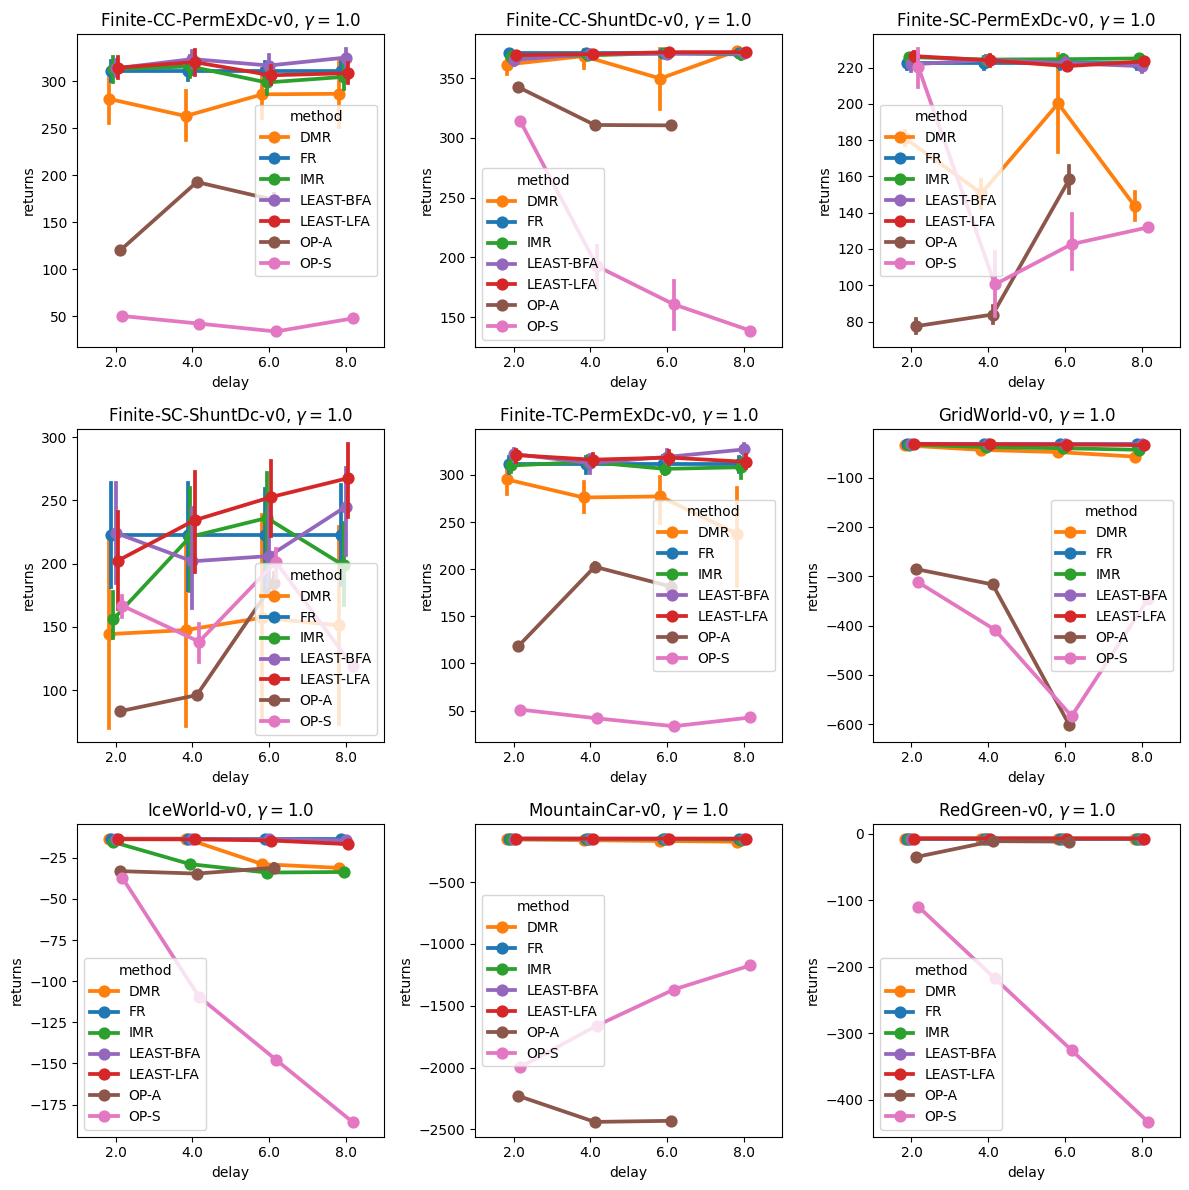

In [40]:
plot_return_ci(df_metrics, gamma=1.0, suffix="sarsa")

{'delay_type': 'fixed', 'delay_mu': 8.0}
{'delay_type': 'fixed', 'delay_mu': 4.0}
{'delay_type': 'fixed', 'delay_mu': 6.0}
{'delay_type': 'fixed', 'delay_mu': 2.0}


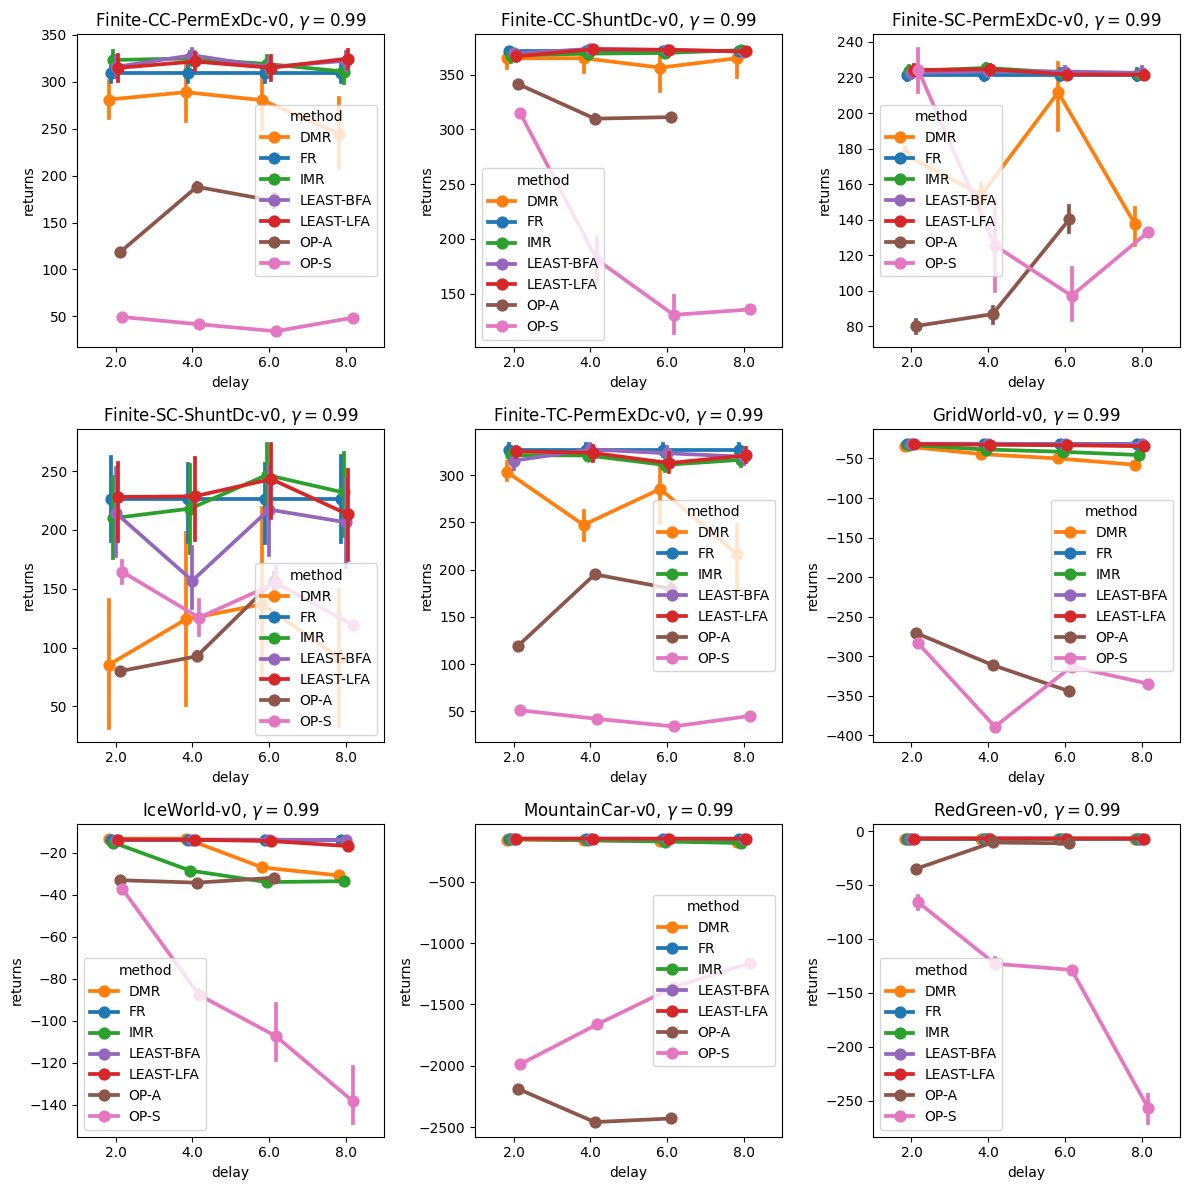

In [41]:
plot_return_ci(df_metrics, gamma=0.99, suffix="sarsa")

In [42]:
def confidence_interval(xs):
    # calculate mean
    mean = np.mean(xs)    
    # standard error
    std_err = stats.sem(xs)
    # degree of freedoms
    degree_f = len(xs) - 1
    return stats.t.interval(0.95, df=len(xs)-1, loc=mean, scale=std_err)

In [43]:
confidence_interval(range(100))

(43.74349058328968, 55.25650941671032)

## Sample distributions

In [44]:
def plot_sample_dist(df_data, num_samples: int = 2):
    df_slice = max_episode_filter(df_data)
    df_slice = df_slice[["method", "meta", "returns"]]
    df_raw = copy.deepcopy(df_slice)
    methods = sorted(df_raw["method"].unique())
    
    fig, axes = plt.subplots(
        nrows=len(methods), ncols=num_samples, figsize=(4*num_samples, 4*len(methods)),
    )
    for row, method in enumerate(methods):
        df_algomethod = df_raw[
            (df_raw["method"] == method)
        ]
        df_samples = df_algomethod.sample(n=num_samples)
        for idx in range(num_samples):
            ax = axes[row, idx]
            sample = df_samples.iloc[idx]
            miu = np.round(np.mean(sample["returns"]), decimals=2)
            sns.histplot(sample["returns"], ax=ax)
            title_template = " ".join([
                method,
                "$\mu$ =", str(miu),
            ])
            ax.set_title(title_template)

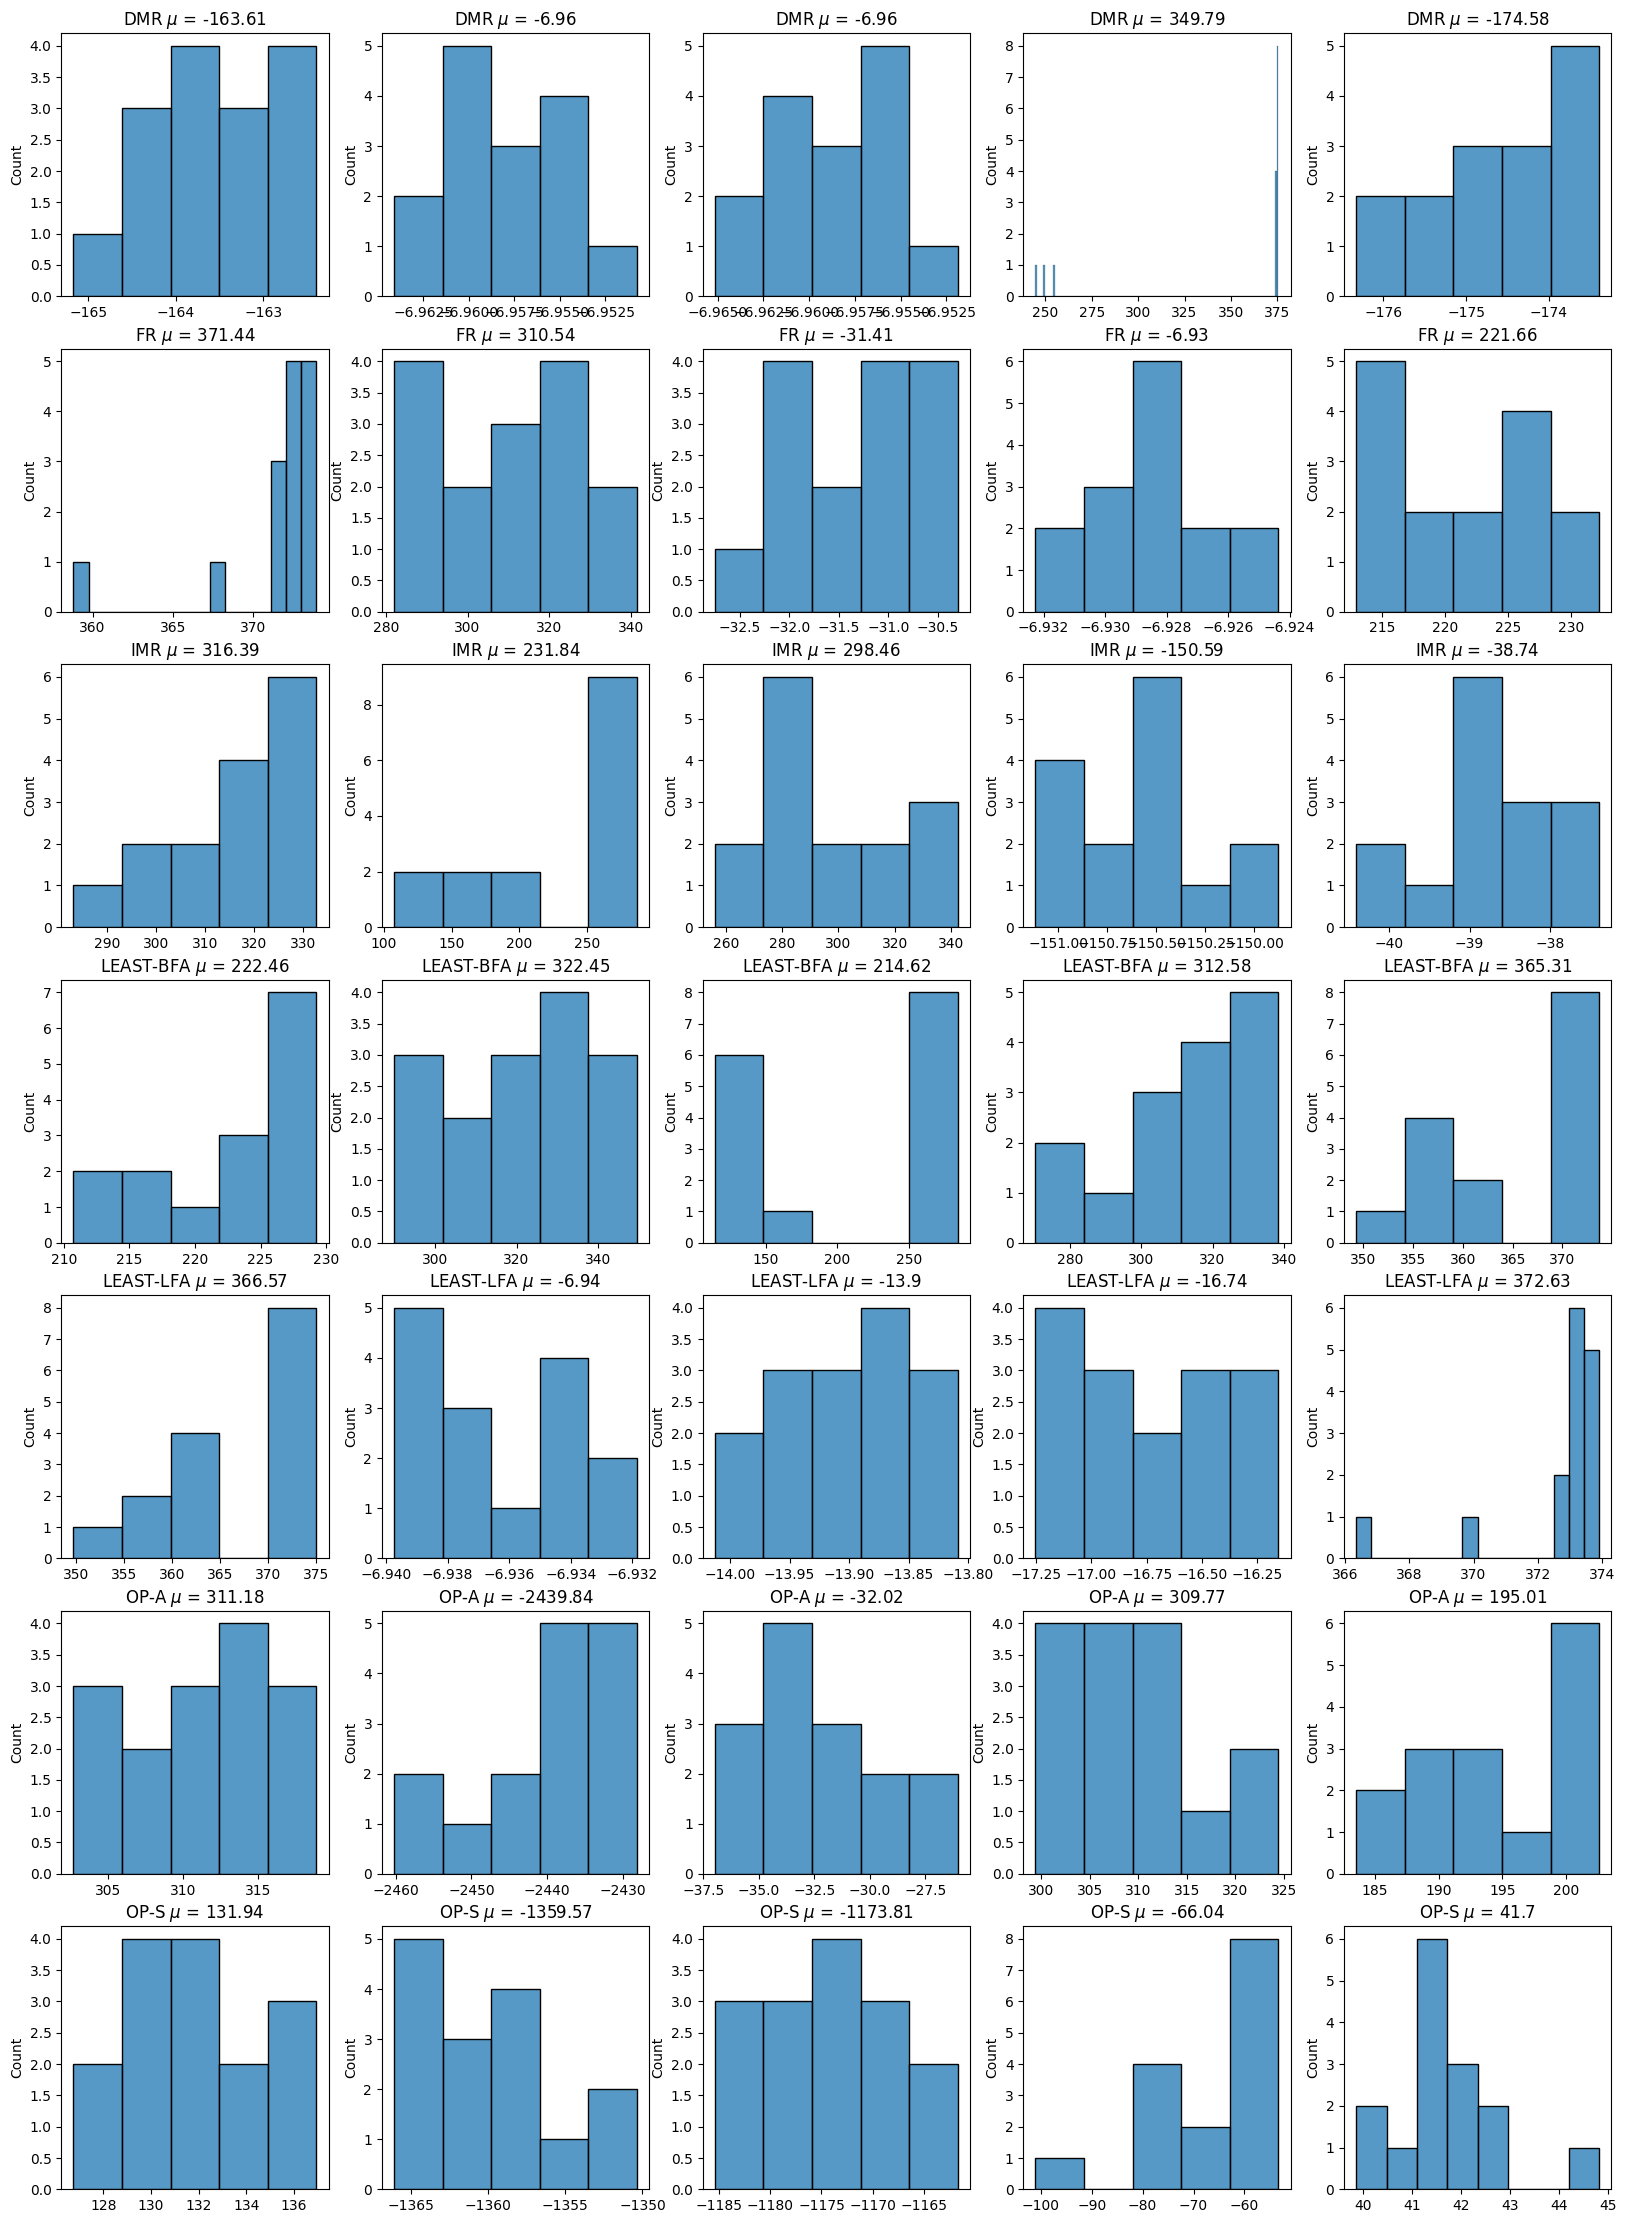

In [45]:
plot_sample_dist(df_metrics, 5)